## KNN - Mnist

Este es un ejemplo de cómo se puede utilizar el algoritmo KNN para clasificar imágenes de dígitos escritos a mano. En este caso, se utiliza el dataset Mnist, que contiene imágenes de dígitos escritos a mano.

In [1]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# dataset mnist
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Importación de datos
digits = datasets.load_digits()
data = digits.data

In [4]:
# Nombre de columnas que conforman los datos
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
# Forma de los datos
print(data.shape) # 1797 filas y 64 columnas (8x8) es decir, 64 pixeles

(1797, 64)


In [7]:
# Variable dependiente
target = digits.target
target # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 (10 clases) Multiclase

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
# Ver los datos de una imagen
print(data[0]) # 64 pixeles (Entre 0 y 16) 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


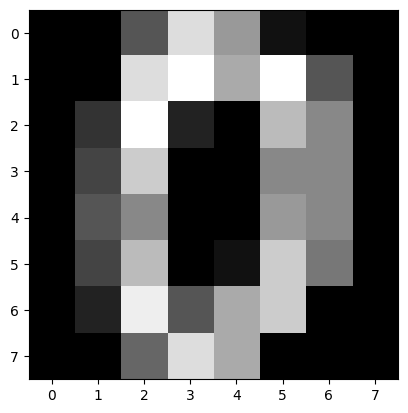

In [9]:
# Visualización de la imagen (0)
plt.imshow(data[0].reshape(8,8), cmap='gray')

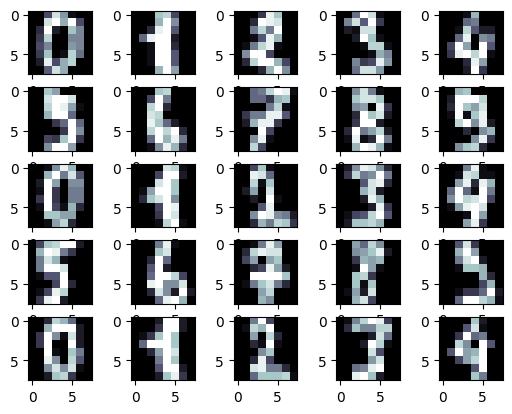

In [11]:
# Imprimir 5x5 datos
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='bone')
   
    

In [14]:
# División de los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4, stratify=target)

In [16]:
# Modelo KNN
K = 10
neigh = KNeighborsClassifier(n_neighbors=K)

In [17]:
# Entrenamiento del modelo
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
# Predicción con la data de entrenamiento
y_train_pred = neigh.predict(x_train)

In [20]:
# Matriz de confusion con datos de entrenamiento
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 145,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 141,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 144,   0,   1,   0,   1,   0,   0],
       [  0,   1,   0,   0, 142,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   1, 142,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0, 145,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 143,   0,   0],
       [  0,   6,   0,   2,   0,   0,   0,   0, 131,   0],
       [  0,   1,   0,   1,   0,   2,   0,   0,   1, 139]])

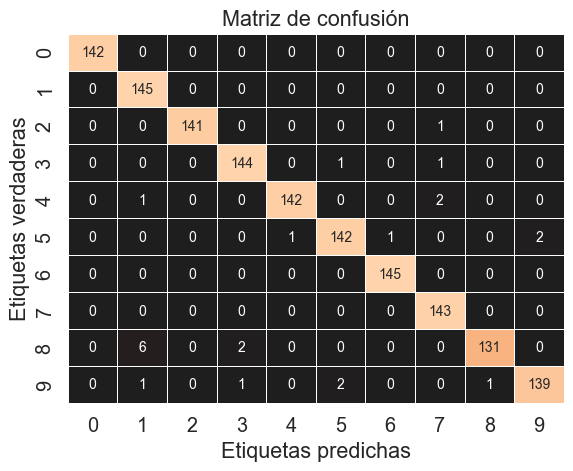

In [24]:
# graficando con Pyplot y seaborn
sns.set_theme(font_scale=1.3)
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='g', center=0, linewidths=0.5, cbar=False)
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas')
plt.title('Matriz de confusión')
plt.show()

In [25]:
# Reporte de clasificación
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.95      1.00      0.97       145
           2       1.00      0.99      1.00       142
           3       0.98      0.99      0.98       146
           4       0.99      0.98      0.99       145
           5       0.98      0.97      0.98       146
           6       0.99      1.00      1.00       145
           7       0.97      1.00      0.99       143
           8       0.99      0.94      0.97       139
           9       0.99      0.97      0.98       144

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



In [26]:
# Predicción con los datos de prueba
y_test_pred = neigh.predict(x_test)

In [27]:
# Matriz de confusión con datos de prueba
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]])

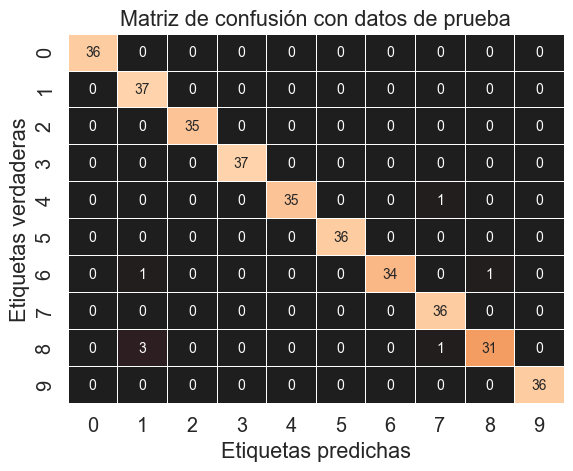

In [28]:
# graficando con Pyplot y seaborn
sns.set_theme(font_scale=1.3)
sns.heatmap(cm_test, annot=True, annot_kws={"size": 10}, fmt='g', center=0, linewidths=0.5, cbar=False)
plt.ylabel('Etiquetas verdaderas')
plt.xlabel('Etiquetas predichas')
plt.title('Matriz de confusión con datos de prueba')
plt.show()

In [31]:
# Reporte de clasificación con datos de prueba
cr_test = classification_report(y_test, y_test_pred)
cr_test

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        36\n           1       0.90      1.00      0.95        37\n           2       1.00      1.00      1.00        35\n           3       1.00      1.00      1.00        37\n           4       1.00      0.97      0.99        36\n           5       1.00      1.00      1.00        36\n           6       1.00      0.94      0.97        36\n           7       0.95      1.00      0.97        36\n           8       0.97      0.89      0.93        35\n           9       1.00      1.00      1.00        36\n\n    accuracy                           0.98       360\n   macro avg       0.98      0.98      0.98       360\nweighted avg       0.98      0.98      0.98       360\n'